In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True)

In [3]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_transform = train_datagen.flow_from_directory(r"C:\Users\babyr\OneDrive\Desktop\Studies\NM-ENGINEERING-Group-1-main\Garbage classification\Garbage classification",
                                           target_size=(128,128),
                                           class_mode='categorical',
                                           batch_size=64)

test_transform = val_datagen.flow_from_directory(r"C:\Users\babyr\OneDrive\Desktop\Studies\NM-ENGINEERING-Group-1-main\Garbage classification\Garbage classification",
                                         target_size=(128,128),
                                         class_mode='categorical',
                                         batch_size=64)

Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [6]:
model = Sequential() # Initializing sequential model

model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu')) # 1st convolution layer
model.add(MaxPooling2D(2, 2))

model.add(Convolution2D(64,(3,3),padding='same',activation='relu')) # 2nd convolution layer
model.add(MaxPooling2D(pool_size=2))

model.add(Convolution2D(32,(3,3),activation='relu')) # 3rd convolution layer
model.add(MaxPooling2D(2, 2))

model.add(Convolution2D(32,(3,3),padding='same',activation='relu')) # 4th convolution layer
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten()) # Flatten layer

model.add(Dense(kernel_initializer='uniform',activation='relu',units=150)) # Hidden layer 1
model.add(Dense(kernel_initializer='uniform',activation='relu',units=68)) # Hidden layer 2
model.add(Dense(kernel_initializer='uniform',activation='softmax',units=6)) # Output layer

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [9]:
res = model.fit_generator(train_transform,
                    steps_per_epoch=2527//64,
                    epochs=30,
                    validation_data=test_transform,
                    validation_steps=782//64)

C:\Users\babyr\AppData\Local\Temp\ipykernel_16196\2920236626.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  res = model.fit_generator(train_transform,


Epoch 1/30
39/39 [==============================] - 46s 1s/step - loss: 1.7350 - acc: 0.2237 - val_loss: 1.7205 - val_acc: 0.2435
Epoch 2/30
39/39 [==============================] - 44s 1s/step - loss: 1.7141 - acc: 0.2282 - val_loss: 1.6686 - val_acc: 0.2331
Epoch 3/30
39/39 [==============================] - 44s 1s/step - loss: 1.6366 - acc: 0.2854 - val_loss: 1.6107 - val_acc: 0.2448
Epoch 4/30
39/39 [==============================] - 49s 1s/step - loss: 1.5120 - acc: 0.3638 - val_loss: 1.4647 - val_acc: 0.3776
Epoch 5/30
39/39 [==============================] - 51s 1s/step - loss: 1.4258 - acc: 0.3910 - val_loss: 1.4254 - val_acc: 0.3802
Epoch 6/30
39/39 [==============================] - 47s 1s/step - loss: 1.3221 - acc: 0.4459 - val_loss: 1.5627 - val_acc: 0.4089
Epoch 7/30
39/39 [==============================] - 45s 1s/step - loss: 1.2813 - acc: 0.4665 - val_loss: 1.2100 - val_acc: 0.4883
Epoch 8/30
39/39 [==============================] - 44s 1s/step - loss: 1.2244 - acc: 0.50

In [10]:
from tensorflow.keras.preprocessing import image
import numpy as np

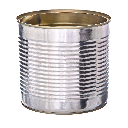

In [14]:
img = image.load_img(r"C:\Users\babyr\Downloads\tincan.jpg",target_size=(128,128))
img

In [15]:
x = image.img_to_array(img)

In [16]:
x = np.expand_dims(x,axis=0) # expanding Dimensions
x

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [17]:
a = np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 399ms/step


In [18]:
index = ['0','1','2','3','4','5']
result = str(index[a[0]])
result

'2'

In [19]:
train_transform.class_indices

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}

In [20]:
index1 = ['cardboard','glass','metal','paper','plastic','trash']
result1 = str(index1[a[0]])
result1

'metal'

In [21]:
model.save('garbage.h5')